## Word2Vec Whirlwind Tour Using Yelp Review Data
### Lynn Cherny (@arnicas, arnicas@gmail.com)

**Note: This repo requires a gzipped file of data to be unzipped, in order to use it from scratch. Otherwise, you can load the model that I saved.**

In [2]:
import json
import gensim
import numpy as np
import string
import tsne as ts # local copy in the repo

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

### You can skip the following steps if you just want to load the word2vec model I provided... but this is the raw data approach.

In [1]:
# We need to unzip the data file to use it:
!gunzip ../data/yelp/yelp_academic_dataset_reviews.json.gz

In [2]:
# Make sure it is there and unzipped:
!ls -al ../data/yelp/

total 541432
drwxr-xr-x   4 lynn  staff        136 Jun 15 16:40 .
drwxr-xr-x  10 lynn  staff        340 Jun 15 16:13 ..
-rw-r--r--   1 lynn  staff  216292386 Jun  4 17:42 yelp_academic_dataset_reviews.json
-rw-r--r--   1 lynn  staff   60917407 Jun  4 17:42 yelp_w2vformat.mod


In [4]:
## Make sure this dataset is here and unzipped.
data = []
with open("../data/yelp/yelp_academic_dataset_reviews.json") as handle:
    for line in handle.readlines():
        yelp = json.loads(line)
        data.append(yelp)

In [6]:
len(data)

229907

In [8]:
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [10]:
revs = [d[u'text'] for d in data]

In [11]:
revs[0]

u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

## What is Word2Vec?

"Generally, word2vec is trained using something called a skip-gram model. The skip-gram model, pictures above, attempts to use the vector representation that it learns to predict the words that appear around a given word in the corpus. Essentially, it uses the context of the word as it is used in a variety of books and other literature to derive a meaningful set of numbers. If the “context” of two words is similar, they will have similar vector representations." ([Source](https://ayearofai.com/lenny-2-autoencoders-and-word-embeddings-oh-my-576403b0113a#.7hg9hiivy))

"In word2vec, a distributed representation of a word is used. Take a vector with several hundred dimensions (say 1000). Each word is representated by a distribution of weights across those elements. So instead of a one-to-one mapping between an element in the vector and a word, the representation of a word is spread across all of the elements in the vector, and each element in the vector contributes to the definition of many words.

If I label the dimensions in a hypothetical word vector (there are no such pre-assigned labels in the algorithm of course), it might look a bit like this:"

<img src="img/word2vec-distributed-representation.png">

[Source](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

So that means we can do associative logic, or analogies, with these models:

<img src="img/word2vec-king-queen-vectors.png">

Specifically, a large enough model of the right kind of language (like a lot of news, or lots of books) will allow you to get "queen" from putting in man, king, woman... and doing vector math on them.  So, king-man+woman=queen. 

[Source](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

<img src="img/word2vec-king-queen-composition.png">

[Source](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)


## Creating a word2vec Model with Gensim 

This takes a while.  You don't need to do this, since I already did it.  You can skip down to the place where we load the file!

In [2]:
""" An alternate from gensim tutorials - just use all words in the model in a rewiew. No nltk used to split."""

import re

class YelpReviews(object):
    """Iterate over sentences of all plaintext files in a directory """
    SPLIT_SENTENCES = re.compile(u"[.!?:]\s+")  # split sentences on these characters

    def __init__(self, objs, field):
        self.field = field
        self.objs = objs

    def __iter__(self):
        for obj in self.objs:
            text = obj[self.field]
            for sentence in self.SPLIT_SENTENCES.split(text):
                yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [3]:
## Don't do this is you already have the model file! Skip to the step after.
## Otherwise, feel free to do it from scratch.
## We pass in the full data objs and use the YelpReviews class to get the 'text' field for us.

#model = gensim.models.Word2Vec(YelpReviews(data, 'text'), min_count=2, workers=2)

#model.save('yelp_w2v_model.mod')

#model.save_word2vec_format('yelp_w2vformat.mod')

In [3]:
# If you already have a model file, load it here:

model = gensim.models.Word2Vec.load_word2vec_format('../data/yelp/yelp_w2vformat.mod')

In [9]:
model.most_similar(positive=["chicken", "waffles"], topn=20)

[(u'chix', 0.775646448135376),
 (u'afritada', 0.7616885304450989),
 (u'fricasee', 0.757086455821991),
 (u'jamburrito', 0.7448266744613647),
 (u'picatta', 0.7321239709854126),
 (u'terriyaki', 0.7299908995628357),
 (u'quesidilla', 0.7295070886611938),
 (u'poa', 0.7289084792137146),
 (u'cashew', 0.7263354063034058),
 (u'mongollion', 0.7261903285980225),
 (u'schwarma', 0.7240502834320068),
 (u'nuggets', 0.7234674692153931),
 (u'kebobs', 0.7221035957336426),
 (u'shwarma', 0.7172635793685913),
 (u'massala', 0.7168341279029846),
 (u'satays', 0.7165632247924805),
 (u'breasts', 0.7162624597549438),
 (u'pow', 0.7160738706588745),
 (u'satay', 0.7155523300170898),
 (u'tika', 0.7148066163063049)]

In [7]:
model.most_similar("waitress")

[(u'waiter', 0.9612302184104919),
 (u'server', 0.9571093320846558),
 (u'bartender', 0.8327537775039673),
 (u'sever', 0.7705729603767395),
 (u'hostess', 0.7437390685081482),
 (u'busser', 0.743442714214325),
 (u'waitperson', 0.7366473078727722),
 (u'adrienne', 0.7293645739555359),
 (u'busboy', 0.7184486985206604),
 (u'brittany', 0.6880886554718018)]

In [9]:
model.vocab.items()[0:5]

[(u'fawn', <gensim.models.word2vec.Vocab at 0x114f77190>),
 (u'belligerence', <gensim.models.word2vec.Vocab at 0x115ae67d0>),
 (u'gai', <gensim.models.word2vec.Vocab at 0x1142a0f50>),
 (u'saimin', <gensim.models.word2vec.Vocab at 0x11487c150>),
 (u'mustachio', <gensim.models.word2vec.Vocab at 0x114b5b090>)]

In [10]:
model.most_similar(['good', 'pizza'])

[(u'sicilian', 0.6312112808227539),
 (u'neopolitan', 0.600825846195221),
 (u'curst', 0.5792971849441528),
 (u'napoletana', 0.5774080157279968),
 (u'calzones', 0.571808397769928),
 (u'tasty', 0.5698818564414978),
 (u'margerita', 0.5669509172439575),
 (u'goood', 0.5603374242782593),
 (u'woodfired', 0.5591259598731995),
 (u'pepperoni', 0.5538390874862671)]

In [11]:
model.most_similar_cosmul(['good', 'pizza']) # less susceptible to extreme outliers

[(u'sicilian', 0.515618085861206),
 (u'neopolitan', 0.5078280568122864),
 (u'curst', 0.505122184753418),
 (u'margerita', 0.49790459871292114),
 (u'woodfired', 0.4968816041946411),
 (u'calzones', 0.49494367837905884),
 (u'napoletana', 0.49478381872177124),
 (u'passable', 0.488089382648468),
 (u'magharita', 0.4854199290275574),
 (u'tasty', 0.4841715693473816)]

In [12]:
model.most_similar(['dog'])

[(u'dogs', 0.7924114465713501),
 (u'sonorian', 0.665751576423645),
 (u'nogales', 0.6413456797599792),
 (u'hellishly', 0.6131397485733032),
 (u'shortleash', 0.6123247742652893),
 (u'vienna', 0.6103050708770752),
 (u'ted', 0.6048383712768555),
 (u'hot', 0.602484941482544),
 (u'sonoran', 0.5981236696243286),
 (u'mongrel', 0.5980825424194336)]

In [13]:
model.most_similar(['salon'])

[(u'salons', 0.6722588539123535),
 (u'stalgia', 0.5703273415565491),
 (u'dentist', 0.569134533405304),
 (u'spa', 0.5645554065704346),
 (u'studio', 0.5602301955223083),
 (u'nail', 0.5538337230682373),
 (u'stylist', 0.5511678457260132),
 (u'nursery', 0.5459238886833191),
 (u'phong', 0.5454494953155518),
 (u'boutique', 0.5449607372283936)]

In [15]:
model.most_similar(positive=['donuts', 'nypd'], negative=['fireman'])

[(u'bosa', 0.5738421082496643),
 (u'subs', 0.5509161949157715),
 (u'chompies', 0.5277150869369507),
 (u'doughnuts', 0.5184479355812073),
 (u'bagels', 0.5135747790336609),
 (u'barro', 0.511047899723053),
 (u'dunkin', 0.51071697473526),
 (u'barros', 0.5052490234375),
 (u'cpk', 0.5020578503608704),
 (u'nello', 0.49832355976104736)]

## Now let's do some basic word sentiment stuff again... for the html side!

In [15]:
import nltk
nltk.data.path = ['../nltk_data']
from nltk.corpus import stopwords
english_stops = stopwords.words('english')

In [13]:
revs[0]

u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [16]:
tokens = [nltk.word_tokenize(rev) for rev in revs]  # this takes a long time. don't run unless you're sure.

In [17]:
mystops = english_stops + [u"n't", u'...', u"'ve"]

In [18]:
def clean_tokens(tokens, stoplist):
    """ Lowercases, takes out punct and stopwords and short strings """
    return [token.lower() for token in tokens if (token not in string.punctuation) and 
                (token.lower() not in stoplist) and len(token) > 2]

In [19]:
clean = [clean_tokens(tok, mystops) for tok in tokens]

In [20]:
from nltk import Text

allclean = [y for x in clean for y in x] # flatten the list of lists
cleantext = Text(allclean)

In [21]:
mostcommon = cleantext.vocab().most_common()[0:1500]
mostcommon_words = [word[0] for word in mostcommon]

In [23]:
mostcommon_words[0:12]

[u'good',
 u'place',
 u'food',
 u'great',
 u'like',
 u'one',
 u'get',
 u'time',
 u'would',
 u'really',
 u'service',
 u'back']

In [24]:
# thing required to get the vectors for tsne

def get_vectors(words, model):
    # requires model be in the binary format, not gensim's
    word_vectors = []
    word_labels = []
    for word in words:
        if word in model:
            word_vectors.append( model[word] )
            word_labels.append(word)
    return word_vectors, word_labels

In [25]:
mymodel = gensim.models.Word2Vec.load_word2vec_format('../data/yelp/yelp_w2vformat.mod')
vectors, labels = get_vectors(mostcommon_words, mymodel)

In [26]:
# should be same as top words above
labels[:12]

[u'good',
 u'place',
 u'food',
 u'great',
 u'like',
 u'one',
 u'get',
 u'time',
 u'would',
 u'really',
 u'service',
 u'back']

In [27]:
res = ts.tsne(np.asfarray(vectors, dtype='float'), 2, 50, 20)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1495 ...
Computing P-values for point  500  of  1495 ...
Computing P-values for point  1000  of  1495 ...
Mean value of sigma:  0.574863843459
Iteration  10 : error is  24.6240356965
Iteration  20 : error is  22.9622313279
Iteration  30 : error is  21.0573571214
Iteration  40 : error is  20.2895732296
Iteration  50 : error is  20.0607934593
Iteration  60 : error is  19.9739325244
Iteration  70 : error is  19.9388011249
Iteration  80 : error is  19.9244659201
Iteration  90 : error is  19.9223337917
Iteration  100 : error is  19.9122110541
Iteration  110 : error is  3.18940403197
Iteration  120 : error is  2.66282715012
Iteration  130 : error is  2.32782535753
Iteration  140 : error is  2.11269642961
Iteration  150 : error is  1.97516057824
Iteration  160 : error is  1.88339515931
Iteration  170 : error is  1.81099643064
Iteration  180 : error is  1.7501762486
Iteration  190 : error i

The "AFINN-111.txt" file is another sentiment file.

In [16]:
from collections import defaultdict
sentiment = defaultdict(int)
with open('../data/sentiment_wordlists/AFINN-111.txt') as handle:
    for line in handle.readlines():
        word = line.split('\t')[0]
        polarity = line.split('\t')[1]
        sentiment[word] = int(polarity)

In [17]:
sentiment['pho']

0

In [18]:
sentiment['good']

3

In [19]:
sentiment['angry']

-3

In [ ]:
sentiment['pizza']

In [201]:
def render_json( vectors, labels, filename ):
    output = []
    vectors = np.array(vectors)
    for i in range(len(vectors)):
        new_hash = {}
        new_hash["word"] = str(labels[i])
        new_hash["x"] = int(vectors[i][0])
        new_hash["y"] = int(vectors[i][1])
        new_hash["sentiment"] = sentiment[str(labels[i])]
        output.append(new_hash)
    with open(filename, 'w') as handle:
        json.dump(output, handle)

In [210]:
render_json(res, labels, "../outputdata/yelp.json")

### TSNE Plotting Stuff

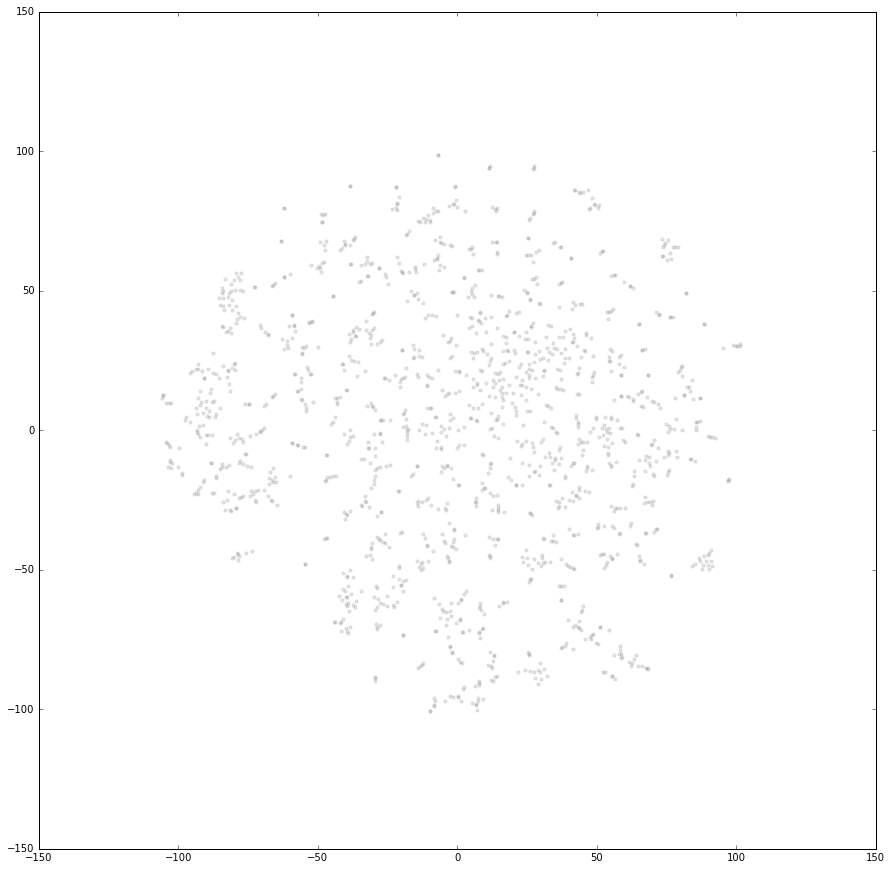

In [33]:
plt.figure(figsize=(15, 15))
plt.scatter(res[:,0], res[:,1], s=10, color='gray', alpha=0.2)

If you go to the file **tsne_yelp.html**, you can interact with this and see what the words are.